In [2]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier

In [3]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [4]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator

calc = BayesianRRCalculator.load('bayesian_rr_calculator.pkl')
global_topological_coefficients = calc.get_coefficients()
print(global_topological_coefficients)
symbols = ['Au', 'Pt']
n_atoms = 79
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    global_topological_coefficients,
    symbols, n_atoms)

energy_calculator = BayesianRRCalculator('TEC')
energy_calculator.set_coefficients(coefficients)

[-0.03324188  0.23653363  0.57347929  0.4383208   0.          0.
  0.          0.          0.          0.          0.83566493  0.81418273
  0.          1.15364881  0.          0.          1.57971154]
Coef symbol_a: Au


In [5]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(NeighborCountingEnvironmentCalculator(symbols), symbols)

In [6]:
from npl.optimization.monte_carlo.monte_carlo_global_features import run_monte_carlo

feature_classifier = testTopologicalFeatureClassifier(symbols)
start_particle = create_start_particle(5, 1, {'Au': 24, 'Pt': 55})
beta, max_steps = 100, 1000


[best_particle, accepted_energies] = run_monte_carlo(beta,
                                                     max_steps,
                                                     start_particle, 
                                                     calc, 
                                                     feature_classifier)

ImportError: cannot import name 'run_basin_hopping' from 'npl.optimization.basin_hopping' (/home/riccardo/bin/repos/NPlib/npl/optimization/basin_hopping/__init__.py)

In [ ]:
from ase.visualize import view

view(best_particle.get_ase_atoms(), viewer='x3d')

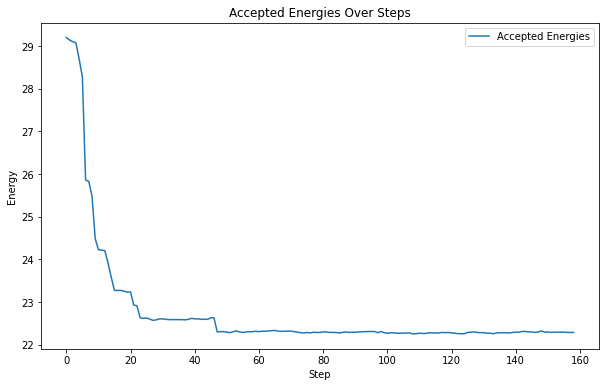

In [ ]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [ ]:
from npl.optimization.monte_carlo.monte_carlo import run_monte_carlo

start_particle = create_start_particle(5, 1, {'Au': 24, 'Pt': 55})
beta, max_steps = 100, 10000


[best_particle, accepted_energies] = run_monte_carlo(beta, max_steps, start_particle, energy_calculator, local_feature_classifier)

Step: 2000
Lowest energy: 22.267868548335223
Step: 4000
Lowest energy: 22.267868548335223
Step: 6000
Lowest energy: 22.257324728266067
Step: 8000
Lowest energy: 22.257324728266067
Step: 10000
Lowest energy: 22.257324728266067
Step: 12000
Lowest energy: 22.25065148851377
Step: 14000
Lowest energy: 22.25065148851377
Step: 16000
Lowest energy: 22.2387063387269
Step: 18000
Lowest energy: 22.2387063387269
Step: 20000
Lowest energy: 22.2387063387269
Step: 22000
Lowest energy: 22.2387063387269
Step: 24000
Lowest energy: 22.2387063387269


In [ ]:
from ase.visualize import view

view(best_particle.get_ase_atoms(), viewer='x3d')

ModuleNotFoundError: No module named 'nglview'

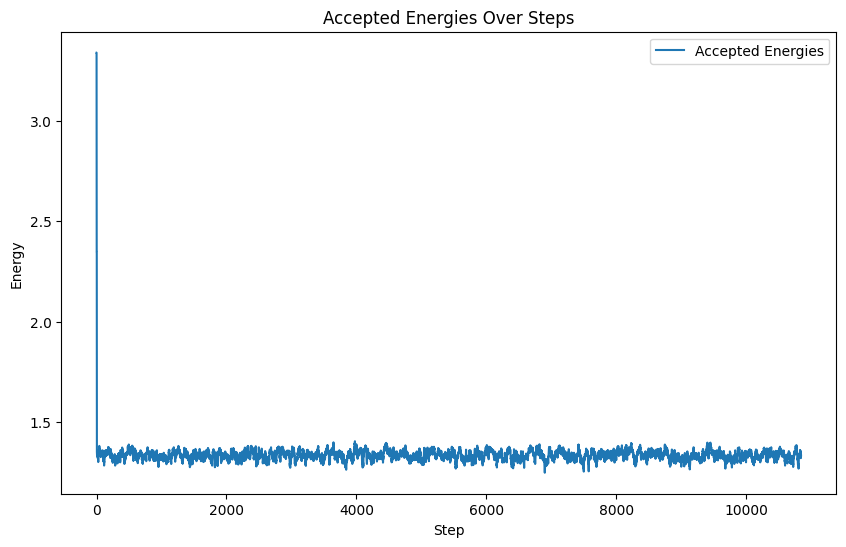

In [ ]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()